created by Ignacio Oguiza - email: oguiza@gmail.com

# Time Series Data Augmentation 

It's a know fact that a way to improve performance of DL models is to get more labeled data. However, this is usually expensive, or impossible. 

A good alternative to getting more labeled data is data augmentation. Data augmentation techniques create multiple synthetic samples that maintain the same label as the original ones.

There are plenty of data augmentation techniques that can be applied to images. However, there are not so many that can be applied to time series. In this notebook, you'll find several examples of these time series data augmentation techniques that you'll be able to apply to your datasets.

In [1]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('autosavetime/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

In [2]:
from IPython.display import display, HTML, clear_output
display(HTML("<style>.container { width:100% !important; }</style>"))

## Import libraries 📚

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai_timeseries import *
from torchtimeseries.models import *

## Time series transforms 

I've added a number of new single-item transforms to the fastai_timeseries library that are now available for use. 
In general there are 2 types of transforms.

1) Those that slightly modify the time series in the x and/ or y-axes: 
- TSmagnoise == TSjittering (1)
- TSmagscale (1)
- TSmagwarp (1)
- TStimenoise (1)
- TStimewarp (1)

2) And those that remove certain part of the time series (a section or channel):
- TSlookback 
- TStimestepsout (1)
- TSchannelout
- TScutout (2)
- TScrop (1)
- TSwindowslice (3)
- TSzoom (1)

All of them can be used independently or in combination. In this section, you'll see how these transforms work.

(1) Adapted from/ inspired by Um, T. T., Pfister, F. M. J., Pichler, D., Endo, S., Lang, M., Hirche, S., ... & Kulić, D. (2017). Data augmentation of wearable sensor data for parkinson's disease monitoring using convolutional neural networks. arXiv preprint arXiv:1706.00527. (includes: Jittering, Scaling, Magnitude-Warping, Time-warping, Random Sampling, among others.

(2) Inspired by DeVries, T., & Taylor, G. W. (2017). Improved regularization of convolutional neural networks with cutout. arXiv preprint arXiv:1708.04552.

(3) Inspired by Le Guennec, A., Malinowski, S., & Tavenard, R. (2016, September). Data augmentation for time series classification using convolutional neural networks.

In [3]:
dsid = 'NATOPS'
bs = 128
scale_type = 'standardize'  # None, 'standardize', 'normalize', 'robustscale'
scale_by_channel = False
scale_by_sample = True
scale_range = (-1, 1)

X_train, y_train, X_valid, y_valid = get_UCR_data(dsid, verbose=True)
bs = min(bs, len(X_train))
ils = ItemLists('.', TSList(X_train),TSList(X_valid))
lls = ils.label_from_lists(y_train, y_valid)
db = (lls.databunch(bs=bs, val_bs=min(len(X_valid), bs * 2),
                    num_workers=cpus, device=device)
      .scale(scale_type=scale_type, scale_by_channel=scale_by_channel, 
             scale_by_sample=scale_by_sample, scale_range=scale_range)
     )

Dataset: NATOPS
Download and decompressing data...
Successfully extracted file /tmp/tmp_of287bw/NATOPS.zip to path data/UCR/NATOPS
...data downloaded and decompressed
Extracting data...
...extraction complete
Successfully extracted dataset
X_train: (180, 24, 51)
y_train: (180,)
X_valid: (180, 24, 51)
y_valid: (180,) 



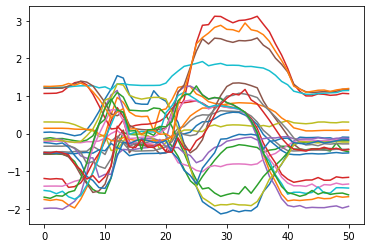

In [4]:
X = db.train_ds.x.items
ts = torch.tensor(X[0])
plt.plot(ts.T)
plt.show()

### TSmagnoise

This tfm changes the values of each individual time step in the TS by a small random amount in the y scale (magnitude). 
There are 2 options: additive noise (default - add=True) or multiplicative noise (add=False).

alpha: amount of noise.

In [5]:
%timeit TSmagnoise(ts)

16.5 µs ± 252 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


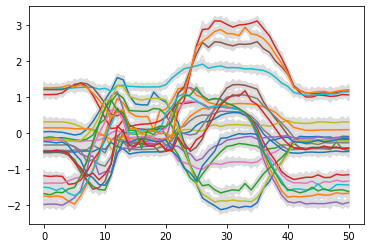

In [56]:
for i in range(100): plt.plot(TSmagnoise(ts, add=True).T, color='gainsboro')
plt.plot(ts.T)
plt.show()

### TSmagscale

This tfm multiplies all values of TS by a 1 + random amount in the y scale (magnitude), thus changing the y scale.

alpha: amount of noise.

In [6]:
%timeit TSmagscale(ts, alpha=.1)

80.7 µs ± 2.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


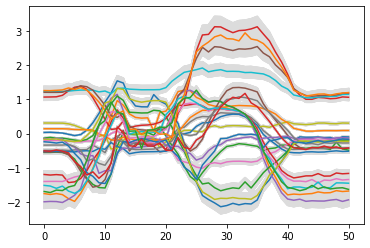

In [58]:
for i in range(100): plt.plot(TSmagscale(ts).T, color='gainsboro')
plt.plot(ts.T)
plt.show()

### TSmagwarp

This tfm changes the values of each individual time step in the TS in the y scale (magnitude) based on a smooth function.

alpha: amount of deviation from the original ts.

order: smoothness of the function. Higher is noisier.

In [7]:
%timeit TSmagwarp(ts, alpha=.05, order=4)

852 µs ± 7.47 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


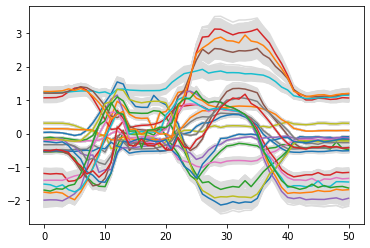

In [23]:
for i in range(100): plt.plot(TSmagwarp(ts).T, color='gainsboro')
plt.plot(ts.T)
plt.show()

### TStimenoise

This tfm changes the values of each individual time step in the TS by a small random amount in the x scale (magnitude). 

alpha: amount of noise.

In [8]:
%timeit TStimenoise(ts, alpha=0.1)

585 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


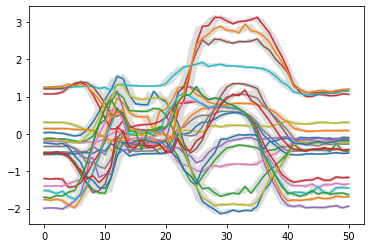

In [24]:
for i in range(100): plt.plot(TStimenoise(ts).T, color='gainsboro')
plt.plot(ts.T)
plt.show()

### TStimewarp

This tfm changes the values of each individual time step in the TS in the x scale (magnitude) based on a smooth function.

alpha: amount of deviation from the original ts.

order: smoothness of the function. Higher is noisier.

In [9]:
%timeit TStimewarp(ts, alpha=0.05, order=4)

949 µs ± 7.72 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


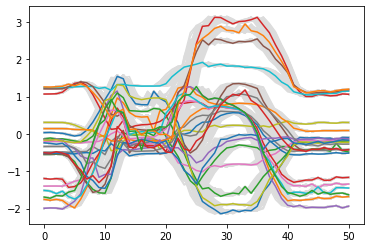

In [25]:
for i in range(100): plt.plot(TStimewarp(ts).T, color='gainsboro')
plt.plot(ts.T)
plt.show()

### TSlookback

This tfm selects a random amount of time steps (starting from the end), and sets the initial steps to zero.
This may be useful when the last part of the time series is the most important one.

alpha: amount the original ts is shortened.

In [10]:
%timeit TSlookback(ts, alpha=0.2)

30.2 µs ± 1.17 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


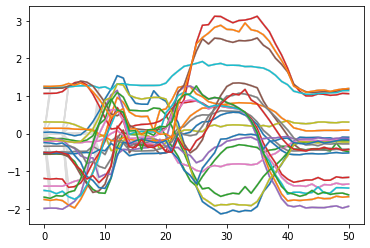

In [26]:
for i in range(10): plt.plot(TSlookback(ts).T, color='gainsboro')
plt.plot(ts.T)
plt.show()

### TStimestepsout

This transform will shorten the TS by random selecting a given percentage of time steps. This ensures all time steps are important.

sel_timesteps: percentage of time steps selected

In [11]:
%timeit TStimestepsout(ts, perc=0.1)

149 µs ± 2.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


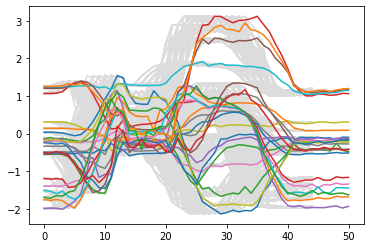

In [27]:
for i in range(100): plt.plot(TStimestepsout(ts).T, color='gainsboro')
plt.plot(ts.T)
plt.show()

### TSchannelout

This tfm selects a random amount of channels, and sets the rest to zero.
This may be useful to ensure all channels are important.

alpha: determines how likely it is that one of more channels are 'removed'.

In [12]:
%timeit TSchannelout(ts, alpha=0.2)

155 µs ± 1.57 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


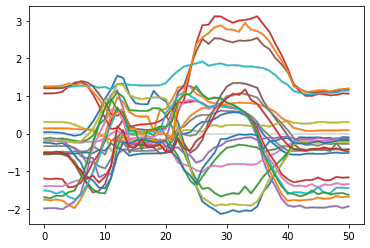

In [28]:
for i in range(100): plt.plot(TSchannelout(ts).T, color='gainsboro')
plt.plot(ts.T)
plt.show()

### TScutout

This tfm sets the values of a random section (consecutive steps) of the time series along the x-axis to 0.

perc: percent of the time steps that will set to 0.

In [13]:
%timeit TScutout(ts, perc=0.1)

47.5 µs ± 1.87 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


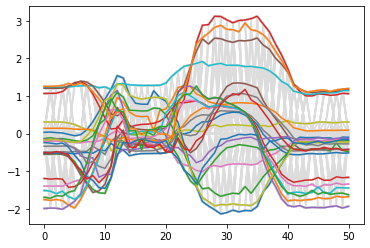

In [29]:
for i in range(100): plt.plot(TScutout(ts).T, color='gainsboro')
plt.plot(ts.T)
plt.show()

### TScrop

This tfm will maintain perc consecutive steps, taken from a random start, and sets the ones before or after to 0. This puts more importance on the time steps in the middle.

perc: percent of steps removed

In [14]:
%timeit TScrop(ts, perc=0.9)

47.8 µs ± 1.68 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


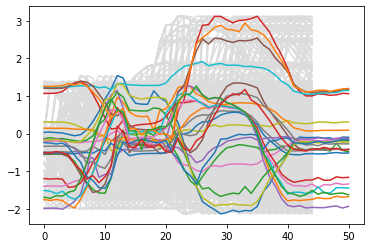

In [30]:
for i in range(100): plt.plot(TScrop(ts).T, color='gainsboro')
plt.plot(ts.T)
plt.show()

### TSwindowslice

This tfm will maintain perc consecutive steps, taken from a random start, and dropping the ones before or after. This puts more importance on the time steps in the middle.

In [15]:
%timeit TSwindowslice(ts, perc=0.9)

16.1 µs ± 353 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


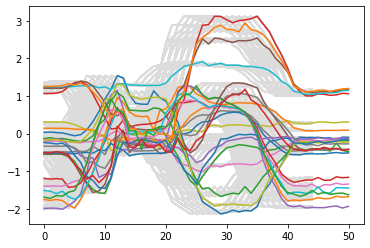

In [31]:
for i in range(100): plt.plot(TSwindowslice(ts, perc=0.9).T, color='gainsboro')
plt.plot(ts.T)
plt.show()

### TSzoom

This tfm drops a random section of the ts at the beginning and/ or the end, and zooms on the rest to make the size equal to the original ts.

alpha: deterines the length of the section dropped

In [16]:
%timeit TSzoom(ts, alpha=0.2)

614 µs ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


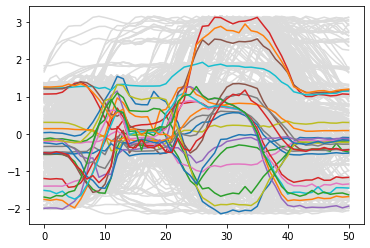

In [32]:
for i in range(100): plt.plot(TSzoom(ts).T, color='gainsboro')
plt.plot(ts.T)
plt.show()

## Experiments

We'll run some experiments to see if data augmentation can improve the result. We'll use the different data augmentation techniques presented.

### Prepare data

In [17]:
dsid = 'LSST'
bs = 128

# Scaling
scale_type = 'standardize'  # None, 'standardize', 'normalize', 'robustscale'
scale_by_channel = False
scale_by_sample = True
scale_range = (-1, 1)  # Used with scale_type == 'normalize' only

In [18]:
X_train, y_train, X_valid, y_valid = get_UCR_data(dsid, verbose=True)
X_test, y_test = None, None
print('mean:', X_train.mean(), ' std:', X_train.std())

Dataset: LSST
Download and decompressing data...
Successfully extracted file /tmp/tmpqzufs8s0/LSST.zip to path data/UCR/LSST
...data downloaded and decompressed
Extracting data...
...extraction complete
Successfully extracted dataset
X_train: (2459, 6, 36)
y_train: (2459,)
X_valid: (2466, 6, 36)
y_valid: (2466,) 

mean: 33.53173110073538  std: 929.5484599126105


In [19]:
tfms = []

In [20]:
bs = min(bs, len(X_train))
ils = ItemLists('.', TSList(X_train),TSList(X_valid))
lls = ils.label_from_lists(y_train, y_valid)
try: 
    lls.transform(tfms=tfms)
    print('tfms:', tfms, '\n')
except: print('No tfms applied\n')
db = (lls.databunch(bs=bs, val_bs=min(len(X_valid), bs * 2),
                    num_workers=cpus, device=device)
      .scale(scale_type=scale_type, scale_by_channel=scale_by_channel, 
             scale_by_sample=scale_by_sample, scale_range=scale_range)
     )
print(db)
print('\nn_classes:', db.c)

tfms: [] 

TSDataBunch;

Train: LabelList (2459 items)
x: TSList
TimeSeries(ch=6, seq_len=36),TimeSeries(ch=6, seq_len=36),TimeSeries(ch=6, seq_len=36),TimeSeries(ch=6, seq_len=36),TimeSeries(ch=6, seq_len=36)
y: CategoryList
0,0,0,0,0
Path: .;

Valid: LabelList (2466 items)
x: TSList
TimeSeries(ch=6, seq_len=36),TimeSeries(ch=6, seq_len=36),TimeSeries(ch=6, seq_len=36),TimeSeries(ch=6, seq_len=36),TimeSeries(ch=6, seq_len=36)
y: CategoryList
0,0,0,0,0
Path: .;

Test: None

n_classes: 14


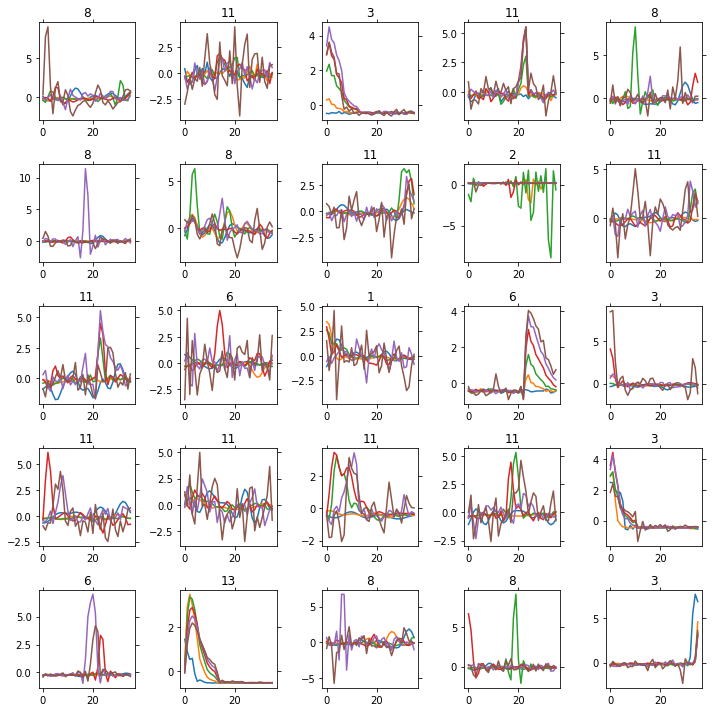

In [21]:
db.show_batch()

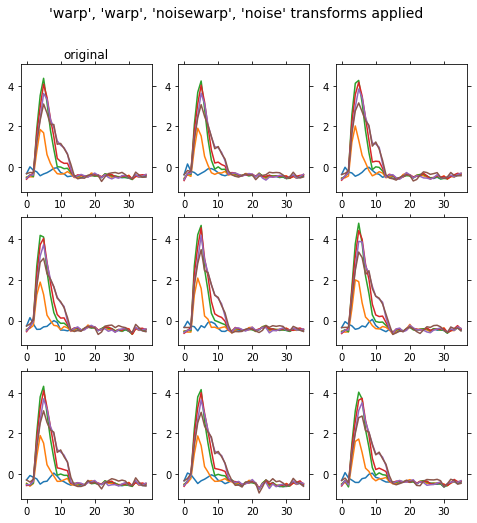

In [22]:
db.train_ds.tfms = get_TS_xy_tfms()[0]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy).show_tfms()

## Train

### No transform

epoch,train_loss,valid_loss,accuracy,time
0,2.445251,2.348795,0.356448,00:01
1,1.968442,1.515199,0.568126,00:01
2,1.639163,1.290708,0.570560,00:01
3,1.411385,1.098676,0.652068,00:01
4,1.242168,1.058880,0.664639,00:01
5,1.109637,1.254686,0.558394,00:01
6,1.015716,1.285614,0.572993,00:01
7,0.940352,1.166134,0.645580,00:01
8,0.884021,1.606773,0.476075,00:01
9,0.841152,1.389779,0.586375,00:01


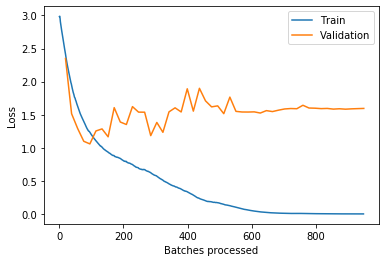

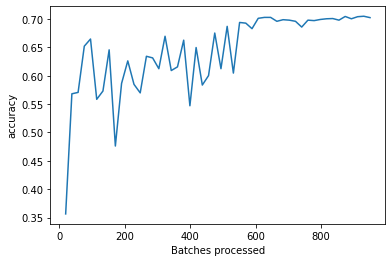

In [46]:
db.train_ds.tfms = []
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

### Single transforms

epoch,train_loss,valid_loss,accuracy,time
0,2.077861,2.173277,0.319951,00:01
1,1.724568,1.407523,0.589619,00:01
2,1.475729,1.220092,0.607056,00:01
3,1.299152,1.044158,0.661395,00:01
4,1.159783,1.108569,0.628143,00:01
5,1.040444,1.395218,0.612733,00:01
6,0.966263,1.044075,0.663423,00:01
7,0.892520,1.118255,0.639092,00:01
8,0.839502,1.253268,0.597729,00:01
9,0.795610,1.931273,0.536902,00:01


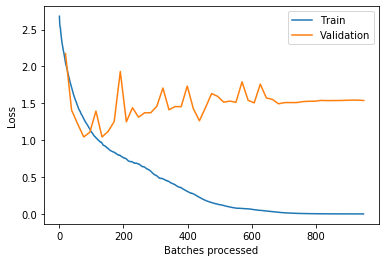

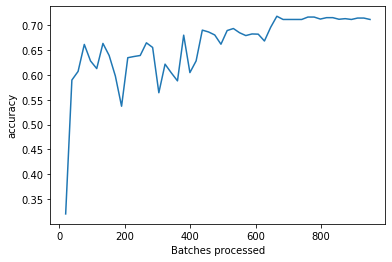

In [65]:
db.train_ds.tfms = [TSmagnoise(p=.5)]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.009075,2.188834,0.360503,00:01
1,1.700027,1.392052,0.600162,00:01
2,1.472558,1.154635,0.635036,00:01
3,1.300835,1.088009,0.660584,00:01
4,1.173177,1.065868,0.652068,00:01
5,1.059344,2.089160,0.529197,00:01
6,0.981635,1.162673,0.620843,00:01
7,0.897800,1.565051,0.606245,00:01
8,0.846614,1.537030,0.603406,00:01
9,0.783854,1.186331,0.618816,00:01


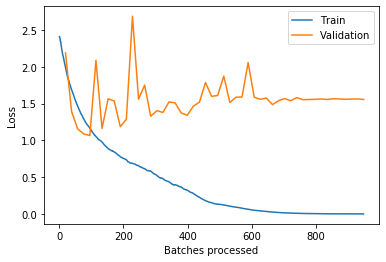

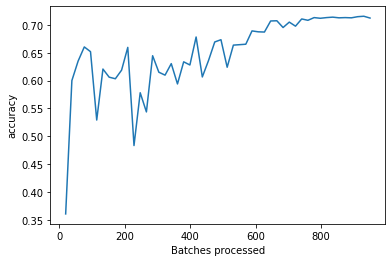

In [66]:
db.train_ds.tfms = [TSmagscale(p=.5)]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.257753,2.248696,0.339011,00:01
1,1.859568,1.412435,0.597729,00:01
2,1.567121,1.399812,0.511354,00:01
3,1.362362,1.088028,0.641119,00:01
4,1.207462,1.058959,0.645580,00:01
5,1.087371,1.190481,0.627737,00:01
6,0.998122,1.186766,0.608678,00:01
7,0.935916,1.212095,0.636659,00:01
8,0.874754,1.301651,0.603001,00:01
9,0.814049,1.870051,0.452149,00:01


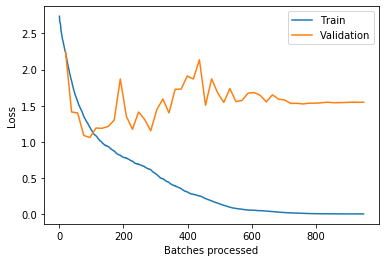

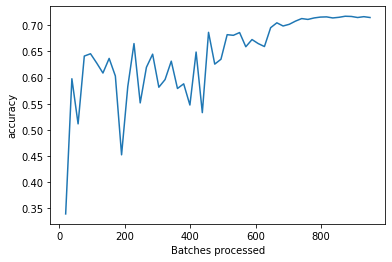

In [67]:
db.train_ds.tfms = [TSmagwarp(p=.5)]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.241155,2.289561,0.360908,00:01
1,1.840457,1.437936,0.574615,00:01
2,1.555901,1.152829,0.630170,00:01
3,1.355178,1.065561,0.670722,00:01
4,1.197951,1.025252,0.676399,00:01
5,1.077920,1.078386,0.662612,00:01
6,0.998062,1.149156,0.641119,00:01
7,0.922383,1.073684,0.649230,00:01
8,0.870719,1.059360,0.645174,00:01
9,0.819209,1.144662,0.641119,00:01


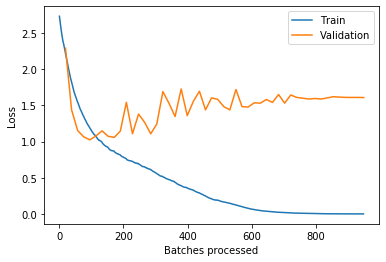

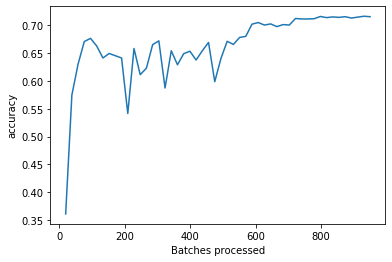

In [68]:
db.train_ds.tfms = [TStimenoise(p=.5)]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.082832,2.204501,0.426196,00:01
1,1.735628,1.394780,0.603406,00:01
2,1.483204,1.230275,0.602190,00:01
3,1.305226,1.143029,0.636253,00:01
4,1.173013,1.029936,0.667478,00:01
5,1.072921,1.044469,0.667883,00:01
6,0.993696,1.141438,0.620438,00:01
7,0.927241,1.586138,0.507299,00:01
8,0.872642,1.269569,0.566099,00:01
9,0.815977,1.750370,0.499189,00:01


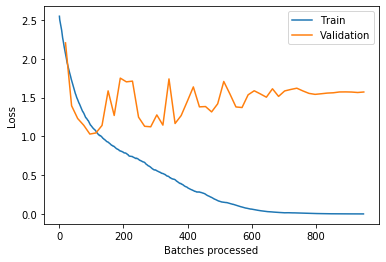

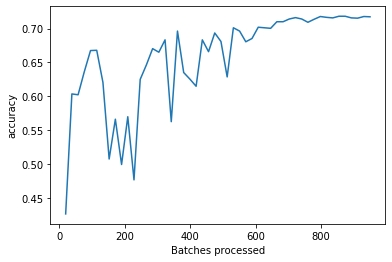

In [69]:
db.train_ds.tfms = [TStimewarp(p=.5)]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.152648,2.320345,0.293998,00:01
1,1.817959,1.462820,0.566099,00:01
2,1.574075,1.185771,0.628143,00:01
3,1.390569,1.108562,0.643147,00:01
4,1.243870,1.167261,0.616788,00:01
5,1.128052,1.274323,0.621249,00:01
6,1.042786,1.762023,0.521087,00:01
7,0.968588,1.224345,0.594891,00:01
8,0.926374,1.516990,0.559611,00:01
9,0.887888,1.483721,0.539335,00:01


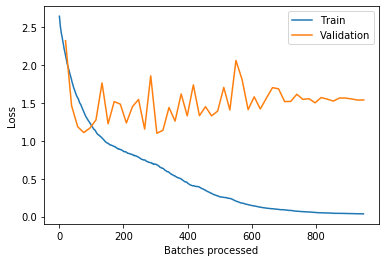

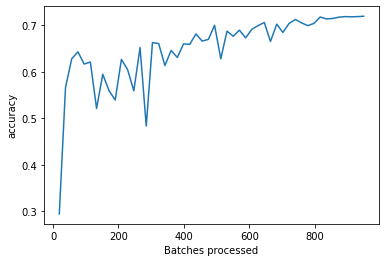

In [70]:
db.train_ds.tfms = [TSlookback(p=.5)]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.090345,2.236952,0.347526,00:01
1,1.734336,1.406677,0.593268,00:01
2,1.506583,1.208957,0.610706,00:01
3,1.342514,1.160309,0.623682,00:01
4,1.213186,1.033621,0.663828,00:01
5,1.102284,1.085094,0.654907,00:01
6,1.029159,1.272929,0.588808,00:01
7,0.973166,1.432836,0.526764,00:01
8,0.942207,1.143194,0.660584,00:01
9,0.911765,1.059669,0.646796,00:01


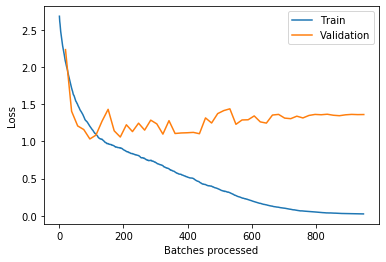

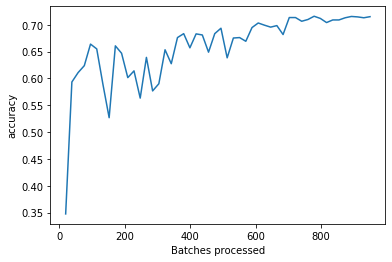

In [71]:
db.train_ds.tfms = [TStimestepsout(p=.5)]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.264849,2.259338,0.323601,00:01
1,1.882466,1.410413,0.576237,00:01
2,1.619533,1.185490,0.632198,00:01
3,1.440820,1.068594,0.658962,00:01
4,1.308781,1.095953,0.654501,00:01
5,1.225088,1.132540,0.633009,00:01
6,1.156379,1.259696,0.628143,00:01
7,1.091388,1.363981,0.575831,00:01
8,1.056015,1.203313,0.637064,00:01
9,1.028016,1.551206,0.460665,00:01


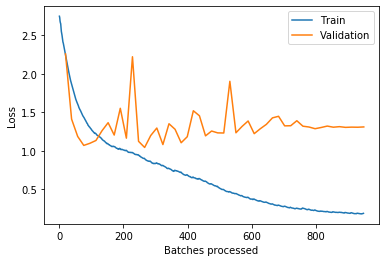

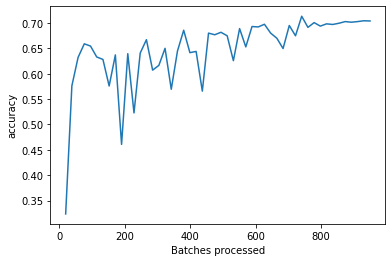

In [72]:
db.train_ds.tfms = [TSchannelout(p=.5)]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.243820,2.194647,0.445255,00:01
1,1.852795,1.450191,0.551500,00:01
2,1.577601,1.273874,0.611922,00:01
3,1.393682,1.082837,0.653285,00:01
4,1.250616,1.023839,0.667478,00:01
5,1.147832,1.024611,0.674371,00:01
6,1.059823,1.501114,0.472425,00:01
7,0.994438,1.403341,0.601379,00:01
8,0.948152,2.233556,0.434712,00:01
9,0.914087,1.076091,0.653285,00:01


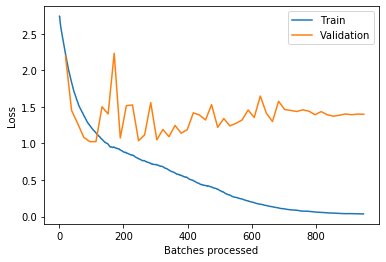

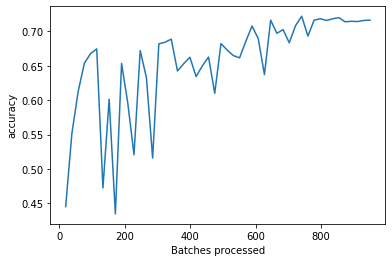

In [73]:
db.train_ds.tfms = [TScutout(p=.5)]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.457610,2.412750,0.316707,00:01
1,2.155764,1.629648,0.494728,00:01
2,1.920209,1.431247,0.521898,00:01
3,1.735162,1.223480,0.604217,00:01
4,1.603346,1.372417,0.523520,00:01
5,1.509977,1.288710,0.602595,00:01
6,1.434783,1.082766,0.665856,00:01
7,1.388807,1.263954,0.598946,00:01
8,1.356881,1.374461,0.488646,00:01
9,1.328111,1.418076,0.574615,00:01


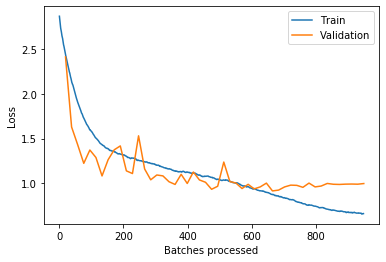

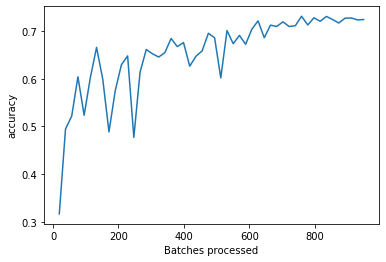

In [74]:
db.train_ds.tfms = [TScrop(p=.5)]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.363273,2.318693,0.375507,00:01
1,1.943803,1.479383,0.582320,00:01
2,1.639562,1.219783,0.633414,00:01
3,1.428090,1.072516,0.656123,00:01
4,1.267657,1.053289,0.665856,00:01
5,1.140366,1.112907,0.651257,00:01
6,1.045315,1.135839,0.651663,00:01
7,0.964616,1.348603,0.593674,00:01
8,0.913749,1.211375,0.624899,00:01
9,0.871371,1.394390,0.560827,00:01


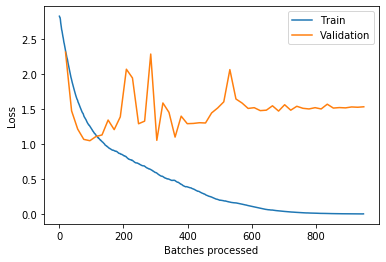

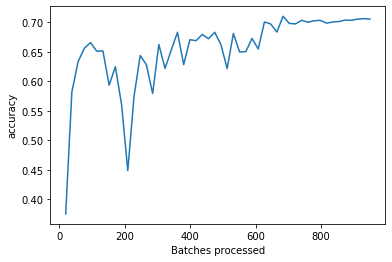

In [76]:
db.train_ds.tfms = [TSwindowslice(p=.5)]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.208497,2.307355,0.338200,00:01
1,1.849829,1.472286,0.577048,00:01
2,1.601057,1.215961,0.622060,00:01
3,1.421810,1.120636,0.643958,00:01
4,1.280667,1.128894,0.640308,00:01
5,1.169982,1.108187,0.635036,00:01
6,1.090132,1.161807,0.595702,00:01
7,1.032284,1.201807,0.594079,00:01
8,1.003395,1.151552,0.651663,00:01
9,0.959764,1.254883,0.641525,00:01


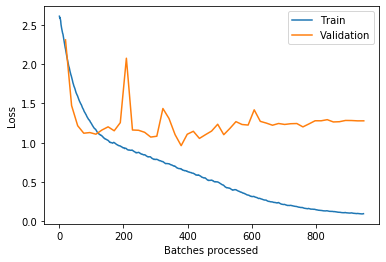

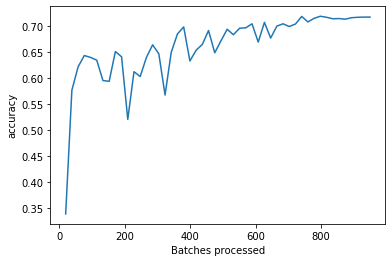

In [77]:
db.train_ds.tfms = [TSzoom(p=.5)]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

### Combined transforms

epoch,train_loss,valid_loss,accuracy,time
0,2.175848,2.217076,0.333333,00:01
1,1.794533,1.436670,0.570154,00:01
2,1.520573,1.174872,0.638686,00:01
3,1.332435,1.062857,0.663828,00:01
4,1.193336,1.004867,0.680860,00:01
5,1.082882,1.163539,0.599351,00:01
6,1.005241,1.273991,0.582725,00:01
7,0.945071,1.179293,0.604217,00:01
8,0.888040,1.103239,0.665045,00:01
9,0.834278,1.141356,0.621655,00:01


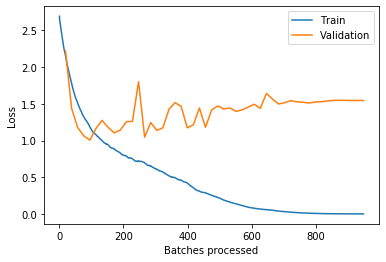

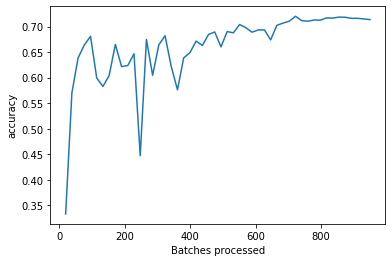

In [78]:
db.train_ds.tfms = [TStimewarp(p=.5), TStimenoise(p=.5)]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.100750,2.212806,0.400649,00:01
1,1.762883,1.384200,0.594485,00:01
2,1.515633,1.172319,0.639903,00:01
3,1.328284,1.118401,0.652474,00:01
4,1.181957,0.993386,0.687753,00:01
5,1.068024,1.036194,0.665856,00:01
6,0.973970,1.263571,0.607867,00:01
7,0.917424,1.136120,0.643147,00:01
8,0.863946,1.688728,0.540957,00:01
9,0.817815,1.667570,0.568938,00:01


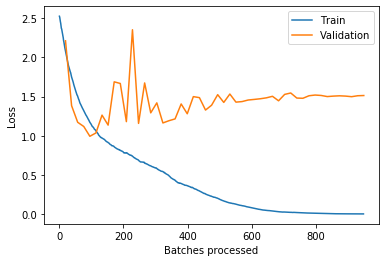

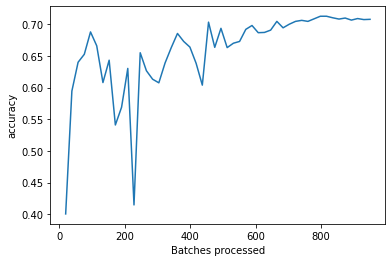

In [79]:
db.train_ds.tfms = [TStimewarp(p=.5), TSmagwarp(p=.5)]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.295391,2.322870,0.335361,00:01
1,1.879126,1.440579,0.599757,00:01
2,1.586487,1.198564,0.617599,00:01
3,1.383054,1.073147,0.656529,00:01
4,1.226009,1.035181,0.678832,00:01
5,1.100350,1.064916,0.660989,00:01
6,1.016517,1.115462,0.636659,00:01
7,0.943698,2.024575,0.532036,00:01
8,0.895119,1.520120,0.486618,00:01
9,0.856973,1.811164,0.536091,00:01


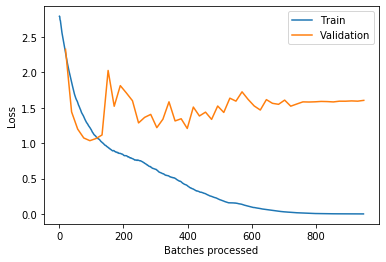

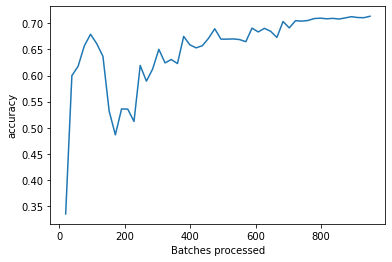

In [80]:
db.train_ds.tfms = [TStimenoise(p=.5), TSmagnoise(p=.5)]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.280292,2.283718,0.395783,00:01
1,1.999549,1.462854,0.575831,00:01
2,1.803282,1.299223,0.584347,00:01
3,1.659234,1.150933,0.630576,00:01
4,1.555311,1.068853,0.658151,00:01
5,1.482460,1.101147,0.635442,00:01
6,1.417743,1.245919,0.508110,00:01
7,1.377072,1.280419,0.570965,00:01
8,1.359412,1.140112,0.611111,00:01
9,1.323204,1.051551,0.643147,00:01


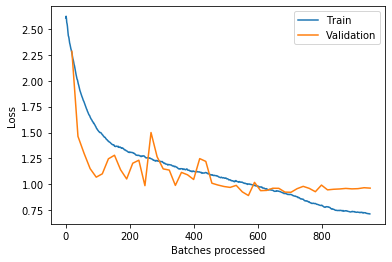

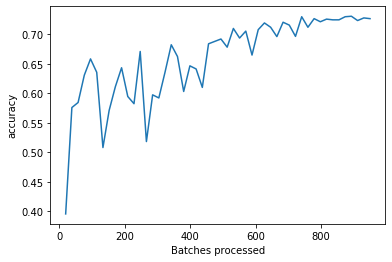

In [81]:
db.train_ds.tfms = [TStimenoise(p=.5), TSmagnoise(p=.5), TScrop(p=.5)]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.388383,2.380154,0.242903,00:02
1,2.137436,1.624277,0.532036,00:02
2,1.926481,1.364783,0.564882,00:02
3,1.756047,1.156707,0.622466,00:02
4,1.642655,1.374999,0.547040,00:02
5,1.552310,1.121747,0.645985,00:02
6,1.485155,1.079774,0.644363,00:02
7,1.442181,1.271778,0.575831,00:02
8,1.403879,1.307922,0.556367,00:02
9,1.372894,1.466417,0.574209,00:02


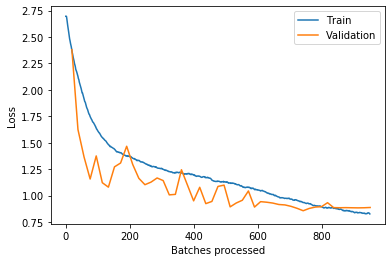

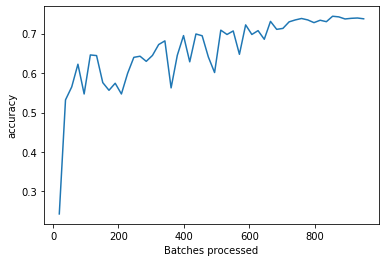

In [82]:
db.train_ds.tfms = [TStimewarp(p=.5), TSmagwarp(p=.5), TStimenoise(p=.5), TSmagnoise(p=.5), TScrop(p=.5)]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.319892,2.269042,0.438362,00:02
1,1.922628,1.492837,0.580292,00:02
2,1.630032,1.211098,0.624493,00:02
3,1.424779,1.128316,0.630170,00:02
4,1.274685,1.056267,0.657340,00:02
5,1.156112,1.059687,0.655312,00:02
6,1.062830,1.026091,0.660989,00:02
7,0.991158,1.077360,0.642741,00:02
8,0.941199,1.021270,0.658556,00:02
9,0.902447,1.246422,0.641119,00:02


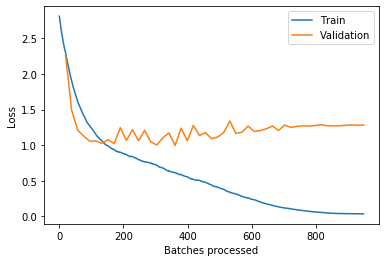

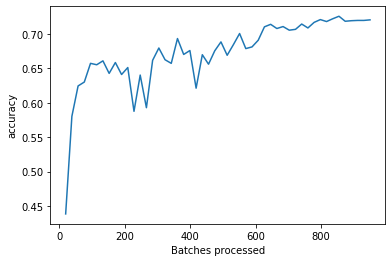

In [83]:
db.train_ds.tfms = [TStimewarp(p=.5), TSmagwarp(p=.5), 
                    TStimenoise(p=.5), TSmagnoise(p=.5), 
                    TStimestepsout(p=.5)]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.230330,2.274155,0.326845,00:01
1,1.865263,1.480830,0.583536,00:01
2,1.587345,1.223590,0.620438,00:01
3,1.399997,1.128057,0.641930,00:01
4,1.254727,1.064277,0.660989,00:01
5,1.137274,1.116797,0.638281,00:01
6,1.052797,1.074157,0.660989,00:01
7,0.993954,1.361341,0.605028,00:01
8,0.949593,1.344633,0.551500,00:01
9,0.915418,1.644271,0.495134,00:01


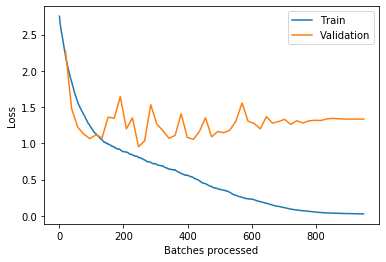

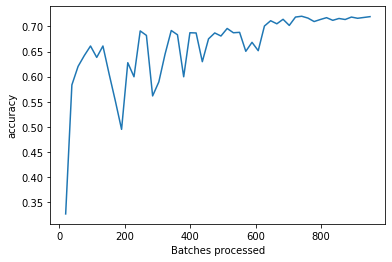

In [84]:
db.train_ds.tfms = [TStimewarp(p=.5), TSmagwarp(p=.5), TStimestepsout(p=.5)]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.135560,2.251985,0.343877,00:01
1,1.783950,1.351721,0.615977,00:01
2,1.538147,1.241708,0.612733,00:01
3,1.362118,1.069685,0.664639,00:01
4,1.220564,1.059424,0.657745,00:01
5,1.119803,1.231307,0.570965,00:01
6,1.046739,1.182978,0.605434,00:01
7,0.984884,1.068624,0.639903,00:01
8,0.945026,1.441960,0.577453,00:01
9,0.919405,1.123266,0.626521,00:01


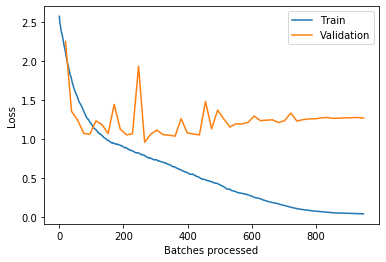

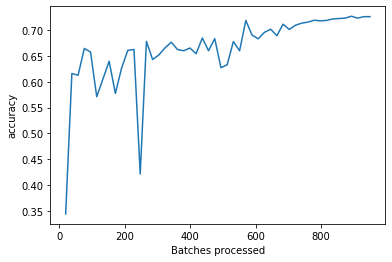

In [85]:
db.train_ds.tfms = [TStimenoise(p=.5), TSmagnoise(p=.5), TStimestepsout(p=.5)]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.278120,2.291169,0.300487,00:02
1,1.861831,1.498352,0.554339,00:02
2,1.579400,1.175983,0.618816,00:02
3,1.383689,1.123666,0.625304,00:02
4,1.241546,1.127886,0.628954,00:02
5,1.133073,1.144518,0.622871,00:02
6,1.057224,1.056128,0.666261,00:02
7,0.981937,1.125274,0.653285,00:02
8,0.935861,1.562962,0.477697,00:02
9,0.893339,1.520609,0.482968,00:02


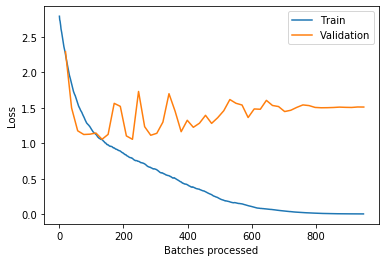

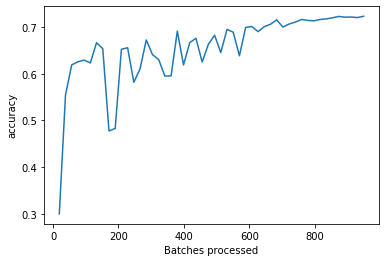

In [51]:
db.train_ds.tfms = get_TS_xy_tfms()[0]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.535599,2.439157,0.330900,00:01
1,2.308511,1.812196,0.356448,00:01
2,2.104168,1.458726,0.537307,00:01
3,1.962646,1.349008,0.552717,00:01
4,1.859268,1.275762,0.577048,00:01
5,1.787998,1.221356,0.586780,00:01
6,1.739397,1.249320,0.568532,00:01
7,1.701165,1.171595,0.602190,00:01
8,1.677020,1.206288,0.605028,00:01
9,1.661010,1.275900,0.548256,00:01


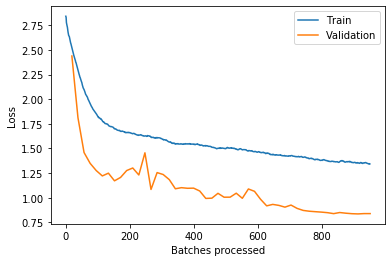

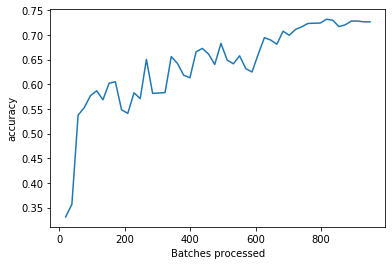

In [54]:
db.train_ds.tfms = get_TS_remove_tfms()[0]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,2.535463,2.449611,0.160178,00:02
1,2.310488,1.765464,0.447283,00:02
2,2.126621,1.537196,0.494728,00:02
3,1.985196,1.468155,0.520681,00:02
4,1.889870,1.418627,0.474453,00:02
5,1.828391,1.331077,0.495945,00:02
6,1.783193,1.760586,0.333333,00:02
7,1.752847,1.272694,0.564071,00:02
8,1.731608,1.367596,0.582725,00:02
9,1.708490,1.431764,0.530819,00:02


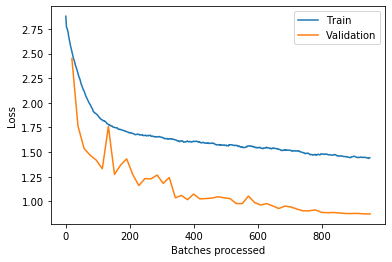

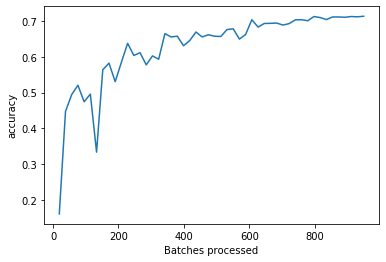

In [53]:
db.train_ds.tfms = get_TS_xy_tfms()[0] + get_TS_remove_tfms()[0]
model = ResNet(db.features, db.c).to(device)
learn = Learner(db, model,metrics=accuracy)
learn.fit_one_cycle(50)
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

### Conclusions

We have seen several types of TS specific data augmentations that can be grouped into: XY axes transforms, and remove transforms. In general, it's difficult to know in advance which TS transform may work better. So, you can try get_TS_xy_tfms, get_TS_remove_tfms, individual transforms or combinations you think may be useful in your particular dataset.

We can see that in this particular case, there are combinations of several time series transformations that can increase performance by 3.5%.

<img src="images/TSAugmentation.png" width=500>